In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('..\Initial_data\K5T10_1\K5T10_1_cor.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_1756\2768519444.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T10_1\K5T10_1_cor.csv', ";")
C:\Users\arufa\AppData\Local\Temp\ipykernel_1756\2768519444.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('..\Initial_data\K5T10_1\K5T10_1_cor.csv', ";")


,K5PC5CH.OP,K5PCV5I.PV,K5T4.PV,K5P21.PV,K5T18_2.PV,K5T7.PV,K5P19_2.PV,K5P19_1.PV,K5PC6CH.OP,K5HCV63I.PV,...,K5T12.PV,K5P13.PV,K5HCV60I.PV,K5P16_1.PV,K5GKAL.PV,K5HCV61I.PV,K5P16_2.PV,K5FCV4_1I.PV,K5Q2_1.PV,K5P4_1.PV
0,31.02161,94.96500,114.5010,-279.1992,75.00625,49.41198,-274.7765,-325.1356,43.14094,99.19063,...,152.0324,3.983025,97.38812,0.5320469,15.29541,97.78464,0.6049101,5.450104,368.9479,10.97927
1,31.07828,94.97078,114.4773,-279.1100,74.89687,49.44865,-274.3475,-323.1846,43.14161,99.07547,...,151.9718,3.981728,97.37245,0.5272148,15.3814,97.80542,0.6093216,5.453073,370.0990,11.02042
2,30.82781,94.96719,114.5524,-277.3275,75.06937,49.45531,-275.6013,-322.9250,43.13417,99.15958,...,151.9571,3.980113,97.40734,0.5339844,15.35248,97.83432,0.6084323,5.451042,368.3698,10.91922
3,30.97302,94.96458,114.2618,-278.3367,75.36188,49.49219,-275.1054,-323.2361,43.16640,99.12093,...,151.9323,3.979872,97.41817,0.5316745,15.33855,97.83901,0.6090326,5.426406,372.7656,10.99307
4,30.98516,94.96724,114.1529,-280.1042,75.17396,49.5276,-273.4646,-319.4931,43.16813,99.06464,...,151.9283,3.978566,97.36542,0.5482396,15.33628,97.78313,0.6045873,5.448646,369.5052,10.91474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24475,55.63448,97.66031,138.2167,-535.8150,91.42375,52.28614,-207.7773,-271.8371,66.48933,99.82797,...,176.0842,4.067581,97.51240,1.217788,21.52003,97.80813,1.35351,30.03682,632.7239,21.92401
24476,55.54047,97.65448,138.1605,-530.9592,91.44312,52.37698,-213.1100,-272.8221,66.47859,99.78938,...,176.0089,4.063694,97.50407,1.245809,21.4593,97.82995,1.34471,30.06958,637.1042,21.94292
24477,55.51609,97.65677,138.2320,-534.3467,91.44583,52.37437,-209.8138,-272.5367,66.46609,99.82796,...,176.0350,4.065034,97.51958,1.232027,21.45812,97.84521,1.346949,30.0425,636.3177,21.99427
24478,55.33755,97.66161,138.1123,-530.2617,91.46604,52.34958,-213.9127,-277.2914,66.43984,99.81010,...,176.0854,4.068994,97.50943,1.244871,21.4981,97.79406,1.348514,30.05328,633.8906,21.88974


<AxesSubplot:>

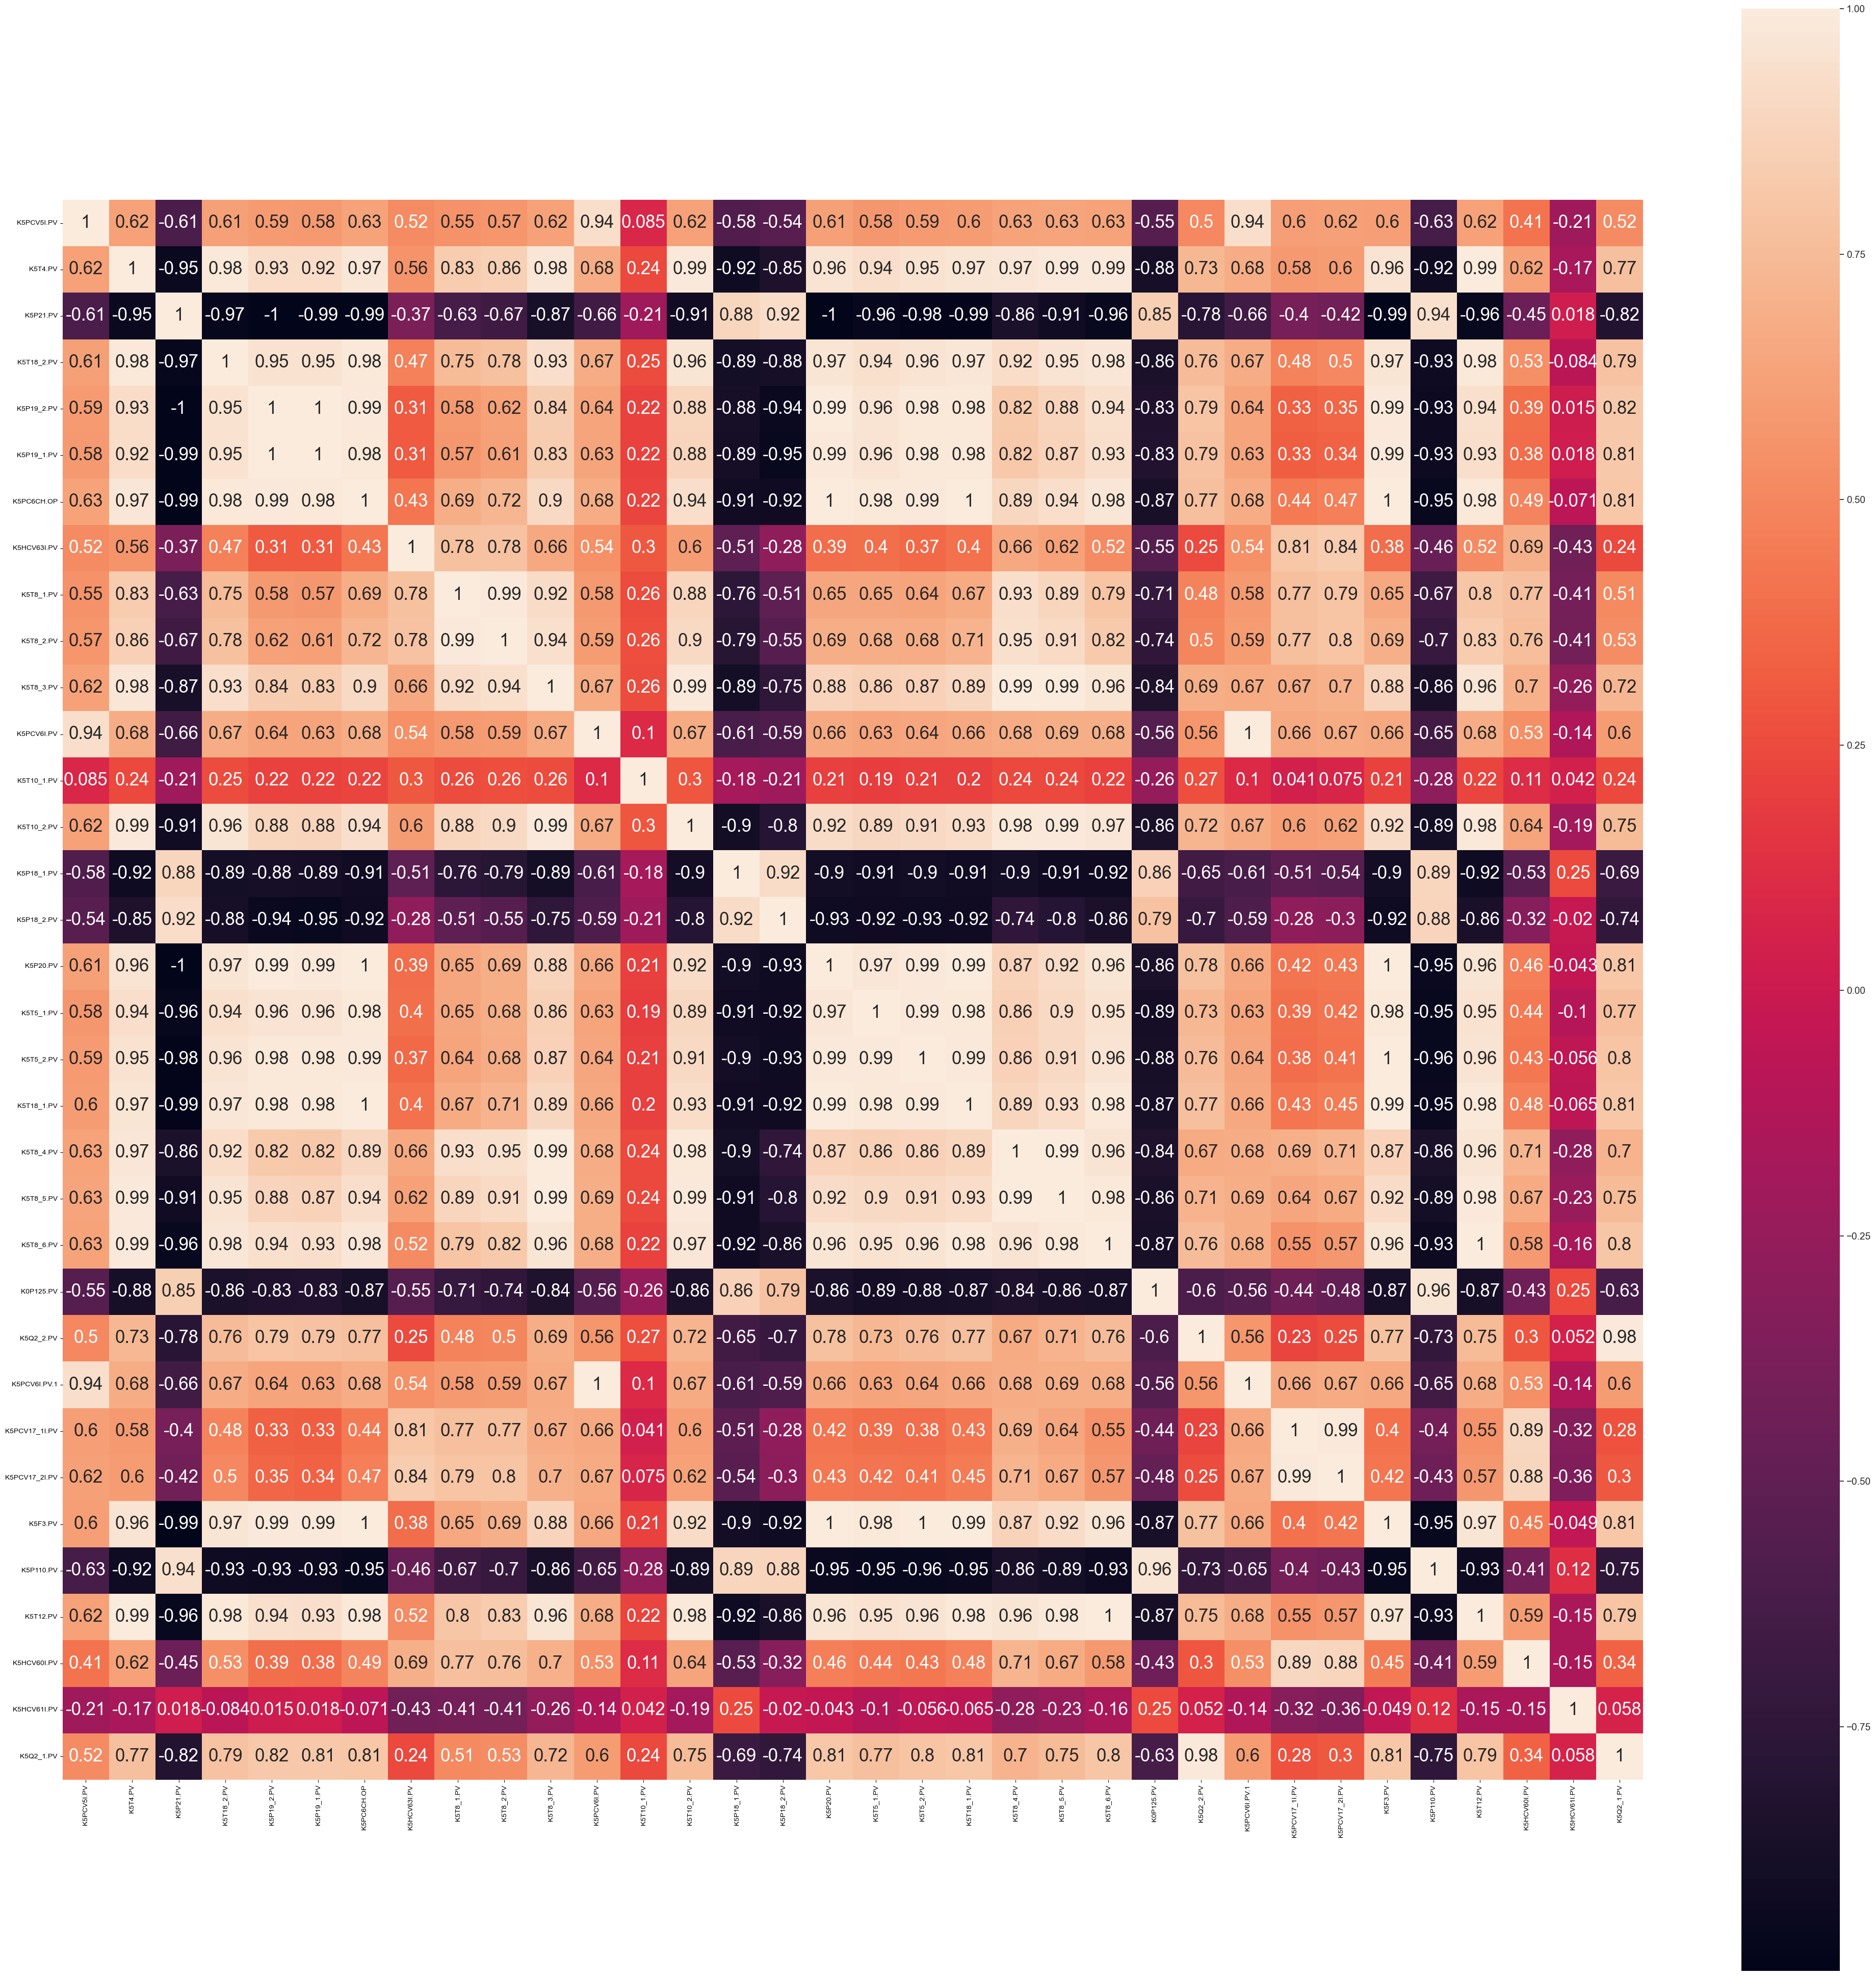

In [3]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [29]:
df = pd.read_csv('..\Initial_data\K5T10_1\K5T10_1.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_1756\426933021.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T10_1\K5T10_1.csv', ";")


,K5PC5CH.OP,K5T4.PV,K5T18_2.PV,K5PC6CH.OP,K5T8_3.PV,K5T10_1.PV
0,48.77187,130.7800,87.97021,60.41125,116.2157,99.99969
1,50.91646,132.4323,89.32250,62.51328,117.4100,99.99958
2,48.53885,130.4775,87.37187,60.37620,115.4810,99.99895
3,48.82729,131.2417,87.39354,60.41177,116.5084,99.99844
4,48.81599,130.6476,87.50604,60.40552,116.2250,99.99844
...,...,...,...,...,...,...
24457,48.75312,130.6502,87.76708,60.41734,116.2535,100.00310
24458,50.97760,132.7168,89.37375,62.50021,117.6574,100.00240
24459,48.57714,130.7999,87.56167,60.40990,115.9082,100.00210
24460,48.59708,131.3362,87.37000,60.39484,116.0255,100.00080


In [30]:
df=df.dropna()
df=df.round(3)
df=df.drop_duplicates(["K5PC5CH.OP"])
df=df.drop_duplicates(["K5T4.PV"])
df=df.drop_duplicates(["K5T18_2.PV"])
df=df.drop_duplicates(["K5PC6CH.OP"])
df=df.drop_duplicates(["K5T8_3.PV"])
df=df.drop_duplicates(["K5T10_1.PV"])
df

,K5PC5CH.OP,K5T4.PV,K5T18_2.PV,K5PC6CH.OP,K5T8_3.PV,K5T10_1.PV
0,48.772,130.780,87.970,60.411,116.216,100.000
2,48.539,130.477,87.372,60.376,115.481,99.999
3,48.827,131.242,87.394,60.412,116.508,99.998
6,48.853,131.130,87.871,60.398,116.115,99.995
9,48.764,131.205,87.683,60.429,116.133,99.993
...,...,...,...,...,...,...
24329,48.529,131.378,87.318,60.393,115.625,100.171
24409,48.677,130.851,87.561,60.469,116.077,100.062
24452,48.501,130.732,87.190,60.371,115.821,100.008
24453,48.751,130.810,87.681,60.423,116.289,100.006


In [31]:
y = df.drop(['K5PC5CH.OP', 'K5T4.PV', "K5T18_2.PV", "K5PC6CH.OP", "K5T8_3.PV"], axis=1)
x = df.drop(['K5T10_1.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)

In [32]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(X_train, y_train)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
clf.score(X_test, y_test)

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 837.0473018198973, tolerance: 59.169717357337824
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1072.9592656315654, tolerance: 59.169717357337824
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1073.134852280782, tolerance: 59.169717357337824
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 707.9621714542154, tolerance: 59.169717357337824
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703.0767337344005, tolerance: 59.169717357337824
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 698.4998620665865, tolerance: 59.169717357337824
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordina

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669.8780585022178, tolerance: 58.06338886747926
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 665.2450537924888, tolerance: 58.06338886747926
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 660.9066302371211, tolerance: 58.06338886747926
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684.2415626293514, tolerance: 59.920322553170664
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 679.5572303052177, tolerance: 59.920322553170664
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675.1710154063185, tolerance: 59.920322553170664
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordina

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 652.801822148147, tolerance: 58.51767030487516
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 648.6486395818647, tolerance: 58.51767030487516
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 644.7603087503812, tolerance: 58.51767030487516
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_d

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 616.70011875208, tolerance: 57.4701940123277
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 611.3457729148795, tolerance: 57.4701940123277
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 606.330109500268, tolerance: 57.4701940123277
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

0.12891968402923326

In [39]:
import pickle
filename = '../model/K5T10_1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [34]:
loaded_model = pickle.load(open("../model/K5T10_1.sav", 'rb'))

In [37]:
task2 = {'K5PC5CH.OP':[54.152],
        'K5T4.PV':[136.26],
        'K5T18_2.PV':[95],
        'K5PC6CH.OP':[65],
        "K5T8_3.PV":[117.62]}
df2 = pd.DataFrame(data=task2)
df2

,K5PC5CH.OP,K5T4.PV,K5T18_2.PV,K5PC6CH.OP,K5T8_3.PV
0,54.152,136.26,95,65,117.62


In [38]:
loaded_model.predict(df2)

array([[84.34841411]])